# BasicTauLeapingSolver

In [1]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_tau_leaping_solver import BasicTauLeapingSolver

### Imports

### Model Instantiation

Model must include rates, species, and reactions

In [2]:
import gillespy2
class VilarOscillator(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="VilarOscillator")
            
            #parameters
            alpha_a = gillespy2.Parameter(name='alpha_a', expression= 50.0)
            alpha_a_prime = gillespy2.Parameter(name='alpha_a_prime', expression= 500.0)
            alpha_r = gillespy2.Parameter(name='alpha_r', expression = 0.01)
            alpha_r_prime = gillespy2.Parameter(name='alpha_r_prime', expression = 50.0)
            beta_a = gillespy2.Parameter(name='beta_a', expression= 50.0)
            beta_r = gillespy2.Parameter(name='beta_r', expression= 5.0)
            delta_ma = gillespy2.Parameter(name='delta_ma', expression = 10.0)
            delta_mr = gillespy2.Parameter(name='delta_mr', expression = 0.5)
            delta_a = gillespy2.Parameter(name='delta_a', expression= 1.0)
            delta_r = gillespy2.Parameter(name='delta_r', expression= 0.2)
            gamma_a = gillespy2.Parameter(name='gamma_a', expression= 1.0)
            gamma_r = gillespy2.Parameter(name='gamma_r', expression= 1.0)
            gamma_c = gillespy2.Parameter(name='gamma_c', expression= 2.0)
            Theta_a = gillespy2.Parameter(name='Theta_a', expression= 50.0)
            Theta_r = gillespy2.Parameter(name='Theta_r', expression= 100.0)
        
            self.add_parameter([alpha_a,alpha_a_prime,alpha_r, alpha_r_prime,beta_a,beta_r,delta_ma,delta_mr,
                               delta_a,delta_r,gamma_a,gamma_r,gamma_c,Theta_a,Theta_r])
            
            #Species
            Da = gillespy2.Species(name='Da', initial_value=1)
            Da_prime = gillespy2.Species(name='Da_prime', initial_value=0)
            Ma = gillespy2.Species(name='Ma', initial_value=0)
            Dr = gillespy2.Species(name='Dr', initial_value=1)
            Dr_prime = gillespy2.Species(name='Dr_prime', initial_value=0)
            Mr = gillespy2.Species(name='Mr',initial_value=0)
            C = gillespy2.Species(name='C',initial_value=10)
            A = gillespy2.Species(name='A',initial_value=10)
            R = gillespy2.Species(name='R',initial_value=10)
            
            self.add_species([Da,Da_prime,Ma,Dr,Dr_prime,Mr,C,A,R])
            
            #reactions
            s_Da = gillespy2.Reaction(name="s_Da",reactants={Da_prime:1}, products={Da:1},rate=Theta_a)
            s_Da_prime = gillespy2.Reaction(name="s_Da_prime",reactants={Da:1,A:1}, products={Da_prime:1},rate=gamma_a)
            s_Dr = gillespy2.Reaction(name="s_Dr",reactants={Dr_prime:1}, products={Dr:1},rate=Theta_r)
            s_Dr_prime = gillespy2.Reaction(name="s_Dr_prime",reactants={Dr:1,A:1}, products={Dr_prime:1},rate=gamma_r)
            s_Ma1 = gillespy2.Reaction(name="s_Ma1",reactants={Da_prime:1},products={Da_prime:1,Ma:1},rate=alpha_a_prime)
            s_Ma2 = gillespy2.Reaction(name="s_Ma2",reactants={Da:1},products={Da:1,Ma:1},rate=alpha_a)
            a_Ma = gillespy2.Reaction(name="a_Ma",reactants={Ma:1},products={},rate=delta_ma)
            s_A1 = gillespy2.Reaction(name="s_A1",reactants={Ma:1},products={A:1,Ma:1},rate=beta_a)
            s_A2 = gillespy2.Reaction(name="S_A2",reactants={Da_prime:1},products={Da_prime:1,A:1},rate=Theta_a)
            s_A3 = gillespy2.Reaction(name="S_A3",reactants={Dr_prime:1},products={Dr_prime:1,A:1},rate=Theta_a)
            a_A = gillespy2.Reaction(name="a_A",reactants={A:1},products={},rate=gamma_c)
            s_C = gillespy2.Reaction(name="s_C",reactants={A:1,R:1},products={C:1},rate=gamma_c)
            S_Mr1 = gillespy2.Reaction(name="S_Mr1",reactants={Dr_prime:1},products={Dr_prime:1,Mr:1},rate=alpha_r_prime)
            S_Mr2 = gillespy2.Reaction(name="S_Mr2",reactants={Dr:1},products={Dr:1,Mr:1},rate=alpha_r)
            a_Mr = gillespy2.Reaction(name="a_Mr",reactants={Mr:1},products={},rate=delta_mr)
            s_R1 = gillespy2.Reaction(name="s_R1",reactants={Mr:1},products={Mr:1,R:1},rate=beta_r)
            a_R = gillespy2.Reaction(name="a_R",reactants={R:1},products={},rate=delta_r)
            s_r2 = gillespy2.Reaction(name="s_r2",reactants={C:1},products={R:1},rate=delta_a)
            
 
            self.add_reaction([s_Da,s_Da_prime,s_Dr,s_Dr_prime,s_Ma1,s_Ma2,a_Ma,s_A1,s_A2,s_A3,a_A,s_C,
                              S_Mr1,S_Mr2,a_Mr,s_R1,a_R,s_r2])
    
            self.timespan(numpy.linspace(0,200,201))

In [3]:
model = VilarOscillator()

### Run Model and plot
Run the model by calling the run function on the model and select solver via 'solver' keyword argument.  if show_labels is True, results are returned as a list of dictionaries, where the list index is the trajectory run index, and dictionary keys are comprised of species names and 'time'.  If show_labels is False, results are returned as a numpy array with indices [trajectory][timestep][species_no]

In [4]:
%time results = model.run(solver=BasicTauLeapingSolver(), show_labels=True)

KeyboardInterrupt: 

In [5]:
results.plot()

NameError: name 'results' is not defined

NameError: name 'results' is not defined

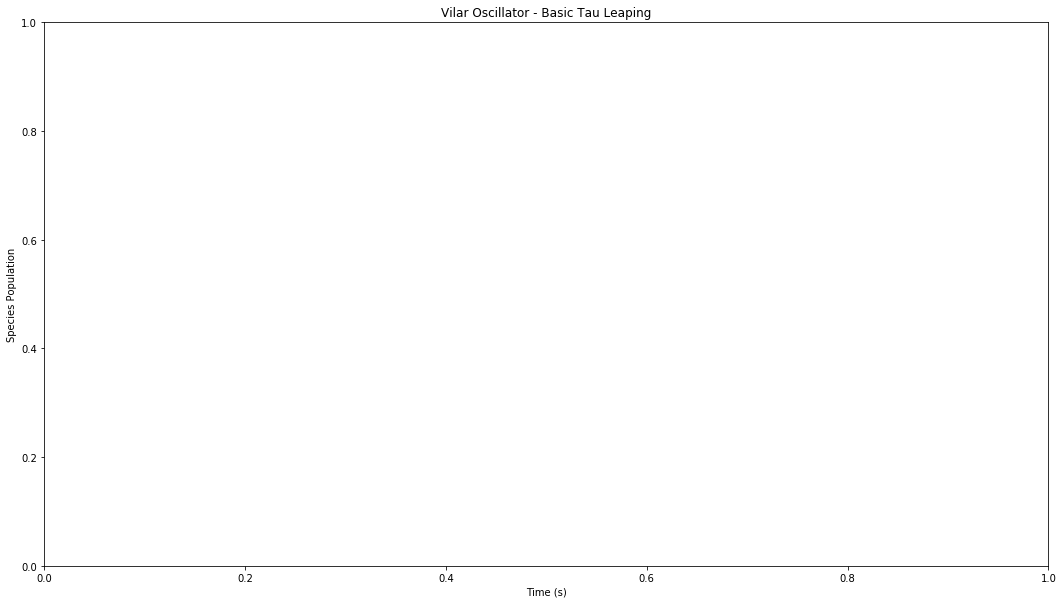

In [6]:
plt.figure(figsize=(18,10))
plt.title("Vilar Oscillator - Basic Tau Leaping")
plt.xlabel("Time (s)")
plt.ylabel("Species Population")

plt.plot(results['time'],results['Da'], label='Da')
plt.plot(results['time'],results['Da_prime'], label='Da_prime')
plt.plot(results['time'],results['Ma'], label='Ma')
plt.plot(results['time'],results['Dr'], label='Dr')
plt.plot(results['time'],results['Dr_prime'], label='Dr_prime')
plt.plot(results['time'],results['Mr'], label='Mr')
plt.plot(results['time'],results['C'],'r', label='C')
plt.plot(results['time'],results['A'],'y', label='A')
plt.plot(results['time'],results['R'],'b', label='R')

plt.plot([0],[11])
plt.legend(loc='best')

### Plotly can be used to create interactive graphs.
 Plotly graphs can only be viewed in a Jupyter Notebook

In [7]:
results.plotplotly()

NameError: name 'results' is not defined